In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Online_Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data= data[pd.notnull(data['CustomerID'])]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

In [6]:
# Removing Duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

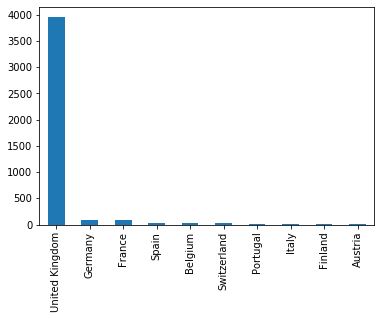

In [7]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [8]:
uk_data=data[data.Country=='United Kingdom']

In [9]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
uk_data = uk_data[(uk_data.Quantity>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null object
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [11]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [12]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [13]:
uk_data['InvoiceDate2'] = pd.to_datetime(uk_data['InvoiceDate'])

In [14]:
uk_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,InvoiceDate2
0,17850.0,2010-12-01,536365,6,2.55,15.30,2010-12-01
1,17850.0,2010-12-01,536365,6,3.39,20.34,2010-12-01
2,17850.0,2010-12-01,536365,8,2.75,22.00,2010-12-01
3,17850.0,2010-12-01,536365,6,3.39,20.34,2010-12-01
4,17850.0,2010-12-01,536365,6,3.39,20.34,2010-12-01
...,...,...,...,...,...,...,...
541889,15804.0,2011-12-09,581585,12,1.95,23.40,2011-12-09
541890,13113.0,2011-12-09,581586,8,2.95,23.60,2011-12-09
541891,13113.0,2011-12-09,581586,24,1.25,30.00,2011-12-09
541892,13113.0,2011-12-09,581586,24,8.95,214.80,2011-12-09


In [15]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In [16]:
PRESENT = dt.datetime(2011,12,9)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [17]:
customer_overview = uk_data.loc[uk_data.CustomerID == 12748]
customer_overview
# print(customer_overview.to_string())

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice,InvoiceDate2
1016,12748.0,2010-12-01,536521,1,4.95,4.95,2010-12-01
3692,12748.0,2010-12-02,536641,1,4.25,4.25,2010-12-02
8448,12748.0,2010-12-05,537136,1,2.95,2.95,2010-12-05
8449,12748.0,2010-12-05,537136,1,2.55,2.55,2010-12-05
8450,12748.0,2010-12-05,537136,1,1.25,1.25,2010-12-05
...,...,...,...,...,...,...,...
541855,12748.0,2011-12-09,581580,1,6.75,6.75,2011-12-09
541856,12748.0,2011-12-09,581580,1,2.95,2.95,2011-12-09
541857,12748.0,2011-12-09,581580,1,1.45,1.45,2011-12-09
541858,12748.0,2011-12-09,581580,2,5.75,11.50,2011-12-09


In [18]:
rfmt= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum(),
                                        'InvoiceDate2': lambda d: (PRESENT - d.min()).days
                                       })

In [19]:
rfmt

,InvoiceDate,InvoiceNo,TotalPrice,InvoiceDate2
CustomerID,,,,
12346.0,325,1,77183.60,325
12747.0,2,103,4196.01,369
12748.0,0,4596,33719.73,373
12749.0,3,199,4090.88,213
12820.0,3,59,942.34,326
...,...,...,...,...
18280.0,277,10,180.60,277
18281.0,180,7,80.82,180
18282.0,7,12,178.05,126


In [20]:
# Change the name of columns
rfmt.columns=['recency','frequency','monetary', 'time']

In [21]:
rfmt['recency'] = rfmt['recency'].astype(int)
rfmt['frequency'] = rfmt['frequency'].astype(int)
rfmt['time'] = rfmt['time'].astype(int)

In [22]:
rfmt.head()

,recency,frequency,monetary,time
CustomerID,,,,
12346.0,325,1,77183.60,325
12747.0,2,103,4196.01,369
12748.0,0,4596,33719.73,373
12749.0,3,199,4090.88,213
12820.0,3,59,942.34,326


In [23]:
# rfmt['r_quartile'] = pd.qcut(rfmt['recency'], 4, ['4','3','2','1'])
# rfmt['f_quartile'] = pd.qcut(rfmt['frequency'], 4, ['1','2','3','4'])
# rfmt['m_quartile'] = pd.qcut(rfmt['monetary'], 4, ['1','2','3','4'])
# rfmt['t_quartile'] = pd.qcut(rfmt['time'], 4, ['4','3','2','1'])

# rfmt['r_quartile'] = pd.qcut(rfmt['recency'], 4, ['1','0.75','0.50','0.25'])
# rfmt['f_quartile'] = pd.qcut(rfmt['frequency'], 4, ['0.25','0.50','0.75','1'])
# rfmt['m_quartile'] = pd.qcut(rfmt['monetary'], 4, ['0.25','0.50','0.75','1'])
# rfmt['t_quartile'] = pd.qcut(rfmt['time'], 4, ['1','0.75','0.50','0.25'])

# rfmt['r_quartile'] = rfmt['r_quartile'].astype(float)
# rfmt['f_quartile'] = rfmt['f_quartile'].astype(float)
# rfmt['m_quartile'] = rfmt['m_quartile'].astype(float)
# rfmt['t_quartile'] = rfmt['t_quartile'].astype(float)

# rfmt['RFM_Score'] = rfmt.r_quartile + rfmt.f_quartile + rfmt.m_quartile + rfmt.t_quartile

# def create_rfm_vector(row):
#        return [row.r_quartile, row.f_quartile, row.m_quartile, row.r_quartile]

# rfmt['RFM_Vector'] = rfmt.apply(create_rfm_vector, axis=1)

In [24]:
rfmt['r_score'] = pd.qcut(rfmt['recency'], 5, ['5','3', '4','2','1'])
rfmt['f_score'] = pd.qcut(rfmt['frequency'], 5, ['1','2','3','4', '5'])
rfmt['m_score'] = pd.qcut(rfmt['monetary'], 5, ['1','2','3','4', '5'])
rfmt['t_score'] = pd.qcut(rfmt['time'], 5, ['5','3', '4','2','1'])

In [25]:
rfmt

,recency,frequency,monetary,time,r_score,f_score,m_score,t_score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,325,1,1,5,2
12747.0,2,103,4196.01,369,5,4,5,1
12748.0,0,4596,33719.73,373,5,5,5,1
12749.0,3,199,4090.88,213,5,5,5,4
12820.0,3,59,942.34,326,5,4,4,2
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,1,1,1,4
18281.0,180,7,80.82,180,1,1,1,3
18282.0,7,12,178.05,126,5,1,1,3


In [26]:
rfmt['RFM_Score'] = rfmt.r_score.astype(str)+ rfmt.f_score.astype(str) + rfmt.f_score.astype(str)
rfmt['RFM_Score'] = rfmt.RFM_Score.astype(int)
rfmt.head()

,recency,frequency,monetary,time,r_score,f_score,m_score,t_score,RFM_Score
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,325,1,1,5,2,111
12747.0,2,103,4196.01,369,5,4,5,1,544
12748.0,0,4596,33719.73,373,5,5,5,1,555
12749.0,3,199,4090.88,213,5,5,5,4,555
12820.0,3,59,942.34,326,5,4,4,2,544


In [27]:
def type_of_customer(row):
    if row.RFM_Score in [555, 554, 544, 545, 454, 455, 445]:
        return 'Champions'
    elif row.RFM_Score in [543, 444, 435, 355, 354, 345, 344, 335]:
        return 'Loyal'
    elif row.RFM_Score in [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]:
        return 'Potential Loyalist'
    elif row.RFM_Score in [512, 511, 422, 421, 412, 411, 311]:
        return 'New Customers'
    elif row.RFM_Score in [525, 524, 523, 522, 521, 515, 514, 513, 425 ,424, 413, 414, 415, 315, 314, 313]:
        return 'Promising'
    elif row.RFM_Score in [535, 534, 443, 434, 343, 334, 325, 324]:
        return 'Need Attention'
    elif row.RFM_Score in [331, 321, 312, 221, 213, 231, 241, 251]:
        return 'About To Sleep'
    elif row.RFM_Score in [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]:
        return 'At Risk'
    elif row.RFM_Score in [155, 154, 144, 214, 215 ,115, 114, 113]:
        return 'Cannot Lose Them'
    elif row.RFM_Score in [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]:
        return 'Hibernating customers'
    elif row.RFM_Score in [111, 112, 121, 131, 141, 151]:
        return 'Lost customers'
    return 'unknown'

In [28]:
rfmt['CustomerSegment'] = rfmt.apply(type_of_customer, axis=1)
rfmt.head()

,recency,frequency,monetary,time,r_score,f_score,m_score,t_score,RFM_Score,CustomerSegment
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,325,1,1,5,2,111,Lost customers
12747.0,2,103,4196.01,369,5,4,5,1,544,Champions
12748.0,0,4596,33719.73,373,5,5,5,1,555,Champions
12749.0,3,199,4090.88,213,5,5,5,4,555,Champions
12820.0,3,59,942.34,326,5,4,4,2,544,Champions


In [29]:
# Filter out Top/Best cusotmers
# print(rfmt[rfmt['CustomerSegment']=='Cannot Lose Them'].sort_values('monetary', ascending=False).count)
# print(rfmt[rfmt['CustomerSegment']=='Cannot Lose Them'].sort_values('monetary', ascending=False).to_string())

In [30]:
rfmt.groupby('CustomerSegment').CustomerSegment.count()

CustomerSegment
At Risk                  320
Cannot Lose Them          78
Champions                685
Hibernating customers    952
Lost customers           325
Loyal                    592
New Customers            444
Potential Loyalist       458
Promising                 67
Name: CustomerSegment, dtype: int64

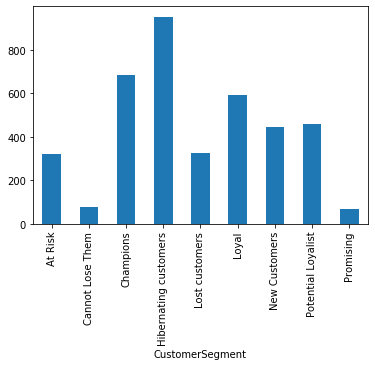

In [31]:
rfmt.groupby('CustomerSegment').CustomerSegment.count().plot(kind='bar')

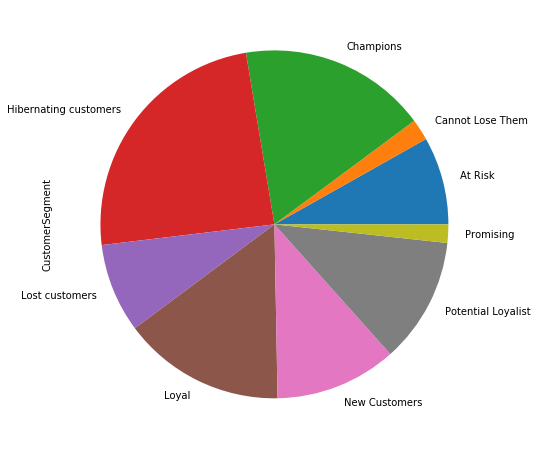

In [32]:
a = rfmt.CustomerSegment.groupby(rfmt.CustomerSegment).size()
a.plot.pie(y = '', figsize=(8,8))

In [34]:
rfmt['RFM_Score_Formular'] = np.sqrt(rfmt.monetary) * rfmt.frequency * 1/(rfmt.recency * 60)

In [35]:
rfmt

,recency,frequency,monetary,time,r_score,f_score,m_score,t_score,RFM_Score,CustomerSegment,RFM_Score_Formular
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,325,1,1,5,2,111,Lost customers,0.014247
12747.0,2,103,4196.01,369,5,4,5,1,544,Champions,55.599929
12748.0,0,4596,33719.73,373,5,5,5,1,555,Champions,inf
12749.0,3,199,4090.88,213,5,5,5,4,555,Champions,70.711320
12820.0,3,59,942.34,326,5,4,4,2,544,Champions,10.061977
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,1,1,1,4,111,Lost customers,0.008086
18281.0,180,7,80.82,180,1,1,1,3,111,Lost customers,0.005827
18282.0,7,12,178.05,126,5,1,1,3,511,New Customers,0.381244
